# High Dimensionality 실습

## Feature Extraction - PCA

### Dataset Load - Breast Cancer Dataset

In [1]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [3]:
X, y = dataset.data, dataset.target

In [4]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (569, 30)
shape of y (569,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 

### Data Preprocessing - Data Split / Feature Scaling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# 주어진 데이터셋을 train, test set으로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [7]:
# StandardScaler 이용한 feature scaling 적용

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data Preprocessing - PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
# feature 수와 동일한 principal component 수를 입력하여 PCA 적용 

pca = PCA(n_components=X_train_scaled.shape[1])
pca.fit(X_train_scaled)

PCA(n_components=30)

In [10]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Reduced shape:", X_train_pca.shape)

Original shape: (426, 30)
Reduced shape: (426, 30)


In [11]:
# pca의 'explained_variance_ratio_' attribute 활용하여 principal component 별 explained_variance_ratio_의 cumulative sum plot 그리기

In [12]:
pca.explained_variance_ratio_

array([4.33151261e-01, 1.95865064e-01, 9.57061086e-02, 6.68256792e-02,
       5.71099742e-02, 4.02177092e-02, 2.17658540e-02, 1.48998125e-02,
       1.41051623e-02, 1.17646492e-02, 1.04466423e-02, 8.92872287e-03,
       7.85431930e-03, 5.01584805e-03, 3.13322648e-03, 2.65044932e-03,
       1.98943309e-03, 1.68551393e-03, 1.49667384e-03, 1.05953262e-03,
       1.05116615e-03, 8.54150580e-04, 7.21294486e-04, 6.01226101e-04,
       5.47278774e-04, 2.60309706e-04, 2.16631872e-04, 4.69695401e-05,
       2.56644788e-05, 3.67268770e-06])

In [13]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [14]:
from matplotlib import pyplot as plt
import numpy as np

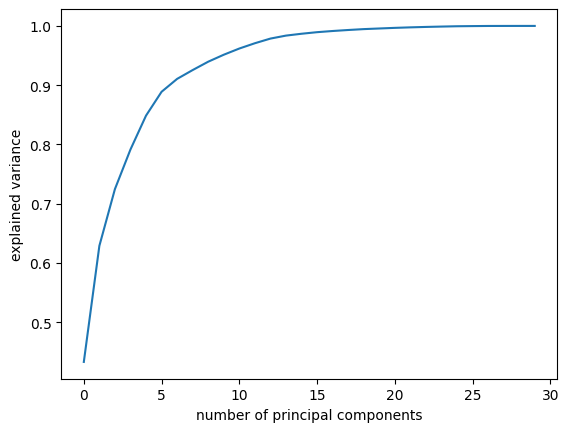

In [15]:
plt.plot(range(X_train_scaled.shape[1]), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('explained variance')
plt.show()

In [16]:
# 위의 plot 기반 적절한 principal component 수 선택 후 새롭게 PCA 적용

In [17]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)

PCA(n_components=10)

In [18]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Reduced shape:", X_train_pca.shape)

Original shape: (426, 30)
Reduced shape: (426, 10)


### Model Training

In [19]:
# 분류 모델 구축을 위한 학습 알고리즘 선택 및 학습 (e.g. KNeighborsClassifier)
## PCA 적용 전 후 각각에 대해 모델 구축 및 학습

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
clf_no_pca = KNeighborsClassifier(n_neighbors=3)
clf_no_pca.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
clf_with_pca = KNeighborsClassifier(n_neighbors=3)
clf_with_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

### Inference

In [23]:
# train, test set에 대해 두 모델의 예측 수행

y_train_hat_no_pca = clf_no_pca.predict(X_train_scaled)
y_test_hat_no_pca = clf_no_pca.predict(X_test_scaled)

y_train_hat_with_pca = clf_with_pca.predict(X_train_pca)
y_test_hat_with_pca = clf_with_pca.predict(X_test_pca)

### Model Evaluation

In [24]:
# accuracy 기반 두 모델의 예측 성능 평가 후 비교

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_train_accuracy_no_pca = accuracy_score(y_train, y_train_hat_no_pca)
y_test_accuracy_no_pca = accuracy_score(y_test, y_test_hat_no_pca)

y_train_accuracy_with_pca = accuracy_score(y_train, y_train_hat_with_pca)
y_test_accuracy_with_pca = accuracy_score(y_test, y_test_hat_with_pca)

In [27]:
print('train accuracy without pca', y_train_accuracy_no_pca)
print('test accuracy without pca', y_test_accuracy_no_pca)

print('train accuracy with pca', y_train_accuracy_with_pca)
print('test accuracy with pca', y_test_accuracy_with_pca)

train accuracy without pca 0.9835680751173709
test accuracy without pca 0.9440559440559441
train accuracy with pca 0.9835680751173709
test accuracy with pca 0.951048951048951


## Feature Selection - Filter Methods

### Dataset Load - Breast Cancer Dataset

In [28]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [29]:
X, y = dataset.data, dataset.target

In [30]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (569, 30)
shape of y (569,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 

### Data Preprocessing - Data Split / Feature Scaling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
# 주어진 데이터셋을 train, test set으로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [33]:
# StandardScaler 이용한 feature scaling 적용

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Selection with Filter Method

In [34]:
# SelectKBest 이용한 feature selection 수행
## Score function으로 f_classif, mutual_info_classif 비교해보기

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [36]:
select_filter = SelectKBest(f_classif, k=20)
#select = SelectKBest(mutual_info_classif)
select_filter.fit(X_train_scaled, y_train)

SelectKBest(k=20)

In [37]:
X_train_selected_filter = select_filter.transform(X_train_scaled)
X_test_selected_filter = select_filter.transform(X_test_scaled)

In [38]:
# 분류 모델 구축을 위한 학습 알고리즘 선택 및 학습 (e.g. KNeighborsClassifier)

clf_filter = KNeighborsClassifier(n_neighbors=3)
clf_filter.fit(X_train_selected_filter, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# test set에 대해 예측 수행 및 accuracy 기반 예측 성능 평가

y_train_hat_filter = clf_filter.predict(X_train_selected_filter)
y_test_hat_filter = clf_filter.predict(X_test_selected_filter)

print('train accuracy with filter method:', accuracy_score(y_train, y_train_hat_filter))
print('test accuracy with filter method:', accuracy_score(y_test, y_test_hat_filter))

train accuracy with filter method: 0.9835680751173709
test accuracy with filter method: 0.951048951048951


### Feature Selection with Wrapper Method

In [40]:
# RFE 이용한 feature selection 수행
## estimator로 다양한 학습 알고리즘 비교해보기

In [41]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [42]:
estimator = SVC(kernel='linear')
select_wrapper = RFE(estimator, n_features_to_select=10, step=1)
select_wrapper.fit(X_train_scaled, y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)

In [43]:
X_train_selected_wrapper = select_wrapper.transform(X_train_scaled)
X_test_selected_wrapper = select_wrapper.transform(X_test_scaled)

In [44]:
select_wrapper.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False, False])

In [45]:
# 분류 모델 구축을 위한 학습 알고리즘 선택 및 학습 (e.g. KNeighborsClassifier)

clf_wrapper = KNeighborsClassifier(n_neighbors=3)
clf_wrapper.fit(X_train_selected_wrapper, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# test set에 대해 예측 수행 및 accuracy 기반 예측 성능 평가

y_train_hat_wrapper = clf_wrapper.predict(X_train_selected_wrapper)
y_test_hat_wrapper = clf_wrapper.predict(X_test_selected_wrapper)

print('train accuracy with wrapper method:', accuracy_score(y_train, y_train_hat_wrapper))
print('test accuracy with wrapper method:', accuracy_score(y_test, y_test_hat_wrapper))

train accuracy with wrapper method: 0.9835680751173709
test accuracy with wrapper method: 0.958041958041958


### Feature Selection with Embedded Method

In [47]:
# SelectFromModel 이용한 feature selection 수행
## estimator로 다양한 학습 알고리즘 비교해보기

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [49]:
fmodel = RandomForestClassifier(random_state=0)
select_embedded = SelectFromModel(fmodel, threshold='mean')
select_embedded.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='mean')

In [50]:
X_train_selected_embedded = select_embedded.transform(X_train_scaled)
X_test_selected_embedded = select_embedded.transform(X_test_scaled)

In [51]:
print(select_embedded.estimator_.feature_importances_)
print(select_embedded.estimator_.feature_importances_ > select_embedded.estimator_.feature_importances_.mean())

[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]
[False False  True  True False False  True  True False False False False
 False  True False False False False False False  True False  True  True
 False False  True  True False False]


In [52]:
print(select_embedded.get_support())
print('number of features selected:', sum(select_embedded.get_support()))

[False False  True  True False False  True  True False False False False
 False  True False False False False False False  True False  True  True
 False False  True  True False False]
number of features selected: 10


In [53]:
# 분류 모델 구축을 위한 학습 알고리즘 선택 및 학습 (e.g. KNeighborsClassifier)

clf_embedded = KNeighborsClassifier(n_neighbors=3)
clf_embedded.fit(X_train_selected_embedded, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# test set에 대해 예측 수행 및 accuracy 기반 예측 성능 평가

y_train_hat_embedded = clf_embedded.predict(X_train_selected_embedded)
y_test_hat_embedded = clf_embedded.predict(X_test_selected_embedded)

print('train accuracy with embedded method:', accuracy_score(y_train, y_train_hat_embedded))
print('test accuracy with embedded method:', accuracy_score(y_test, y_test_hat_embedded))

train accuracy with embedded method: 0.960093896713615
test accuracy with embedded method: 0.9370629370629371
